In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Aluguel de bikes como taxis em NY

In [2]:
df = pd.read_csv("data/taxis_bikes_nycity.csv")

In [3]:
df.head(10)

,Data,Distancia,Tempo
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN
5,8/8/15,3.40,NaN
6,8/9/15,2.50,NaN
7,8/10/15,3.36,0:28:37
8,8/11/15,1.67,0:13:07
9,8/12/15,1.42,0:10:35


In [4]:
df.shape

(81, 3)

In [5]:
df.index

RangeIndex(start=0, stop=81, step=1)

In [6]:
df["Data"].head()

0    8/2/15
1    8/3/15
2    8/4/15
3    8/6/15
4    8/7/15
Name: Data, dtype: object

In [7]:
df.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

In [8]:
df.columns

Index(['Data', 'Distancia', 'Tempo'], dtype='object')

In [9]:
# convertendo coluna Data para datetime64[ns] na importação

df = pd.read_csv("datasets/taxis_bikes_nycity.csv", parse_dates = ['Data'])

In [10]:
df.dtypes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [11]:
df["Data"].head()

0   2015-08-02
1   2015-08-03
2   2015-08-04
3   2015-08-06
4   2015-08-07
Name: Data, dtype: datetime64[ns]

In [12]:
# indexando por Data (Série Temporal)
# facilita na visualizacao de dados
df.set_index("Data", inplace=True)

In [13]:
df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


<AxesSubplot:xlabel='Data'>

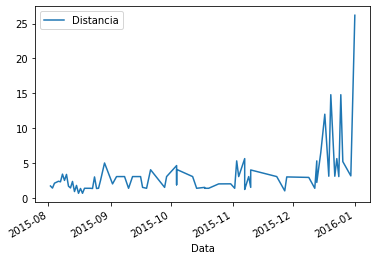

In [14]:
# x = Data (indice)
df.plot()

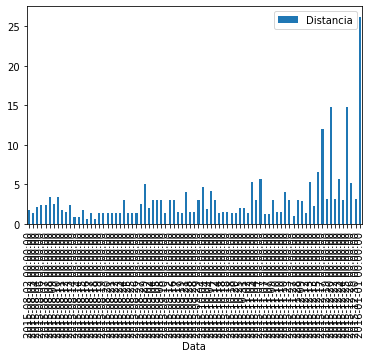

In [15]:
df.plot(kind="bar")
plt.show()

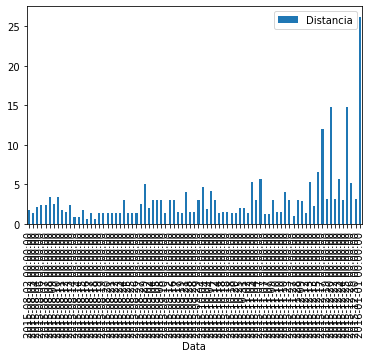

In [16]:
df.plot(kind = "bar")
plt.show()

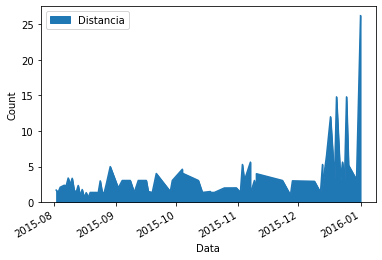

In [17]:
df.plot(kind = "area")
plt.ylabel("Count")
plt.show()

In [18]:
df.describe()

,Distancia
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


In [19]:
# mes/ano
df['2015-11']

,Distancia,Tempo
Data,,
2015-11-02,1.37,0:08:43
2015-11-03,5.30,0:39:26
2015-11-04,3.05,0:22:12
2015-11-07,5.63,0:49:05
2015-11-07,1.26,NaN
2015-11-07,1.20,NaN
2015-11-09,3.05,0:22:36
2015-11-10,1.50,0:09:00
2015-11-10,1.50,0:11:33


In [20]:
df.to_csv("datasets/df_saved1.csv")

In [22]:
df = pd.read_csv("datasets/df_saved1.csv", parse_dates = ["Data"])

In [23]:
df.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [24]:
df.dtypes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [25]:
cols = ["Data", "Distancia", "Tempo"]
df.columns = cols

In [26]:
df.set_index("Data", inplace = True)

In [27]:
df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


<AxesSubplot:xlabel='Data'>

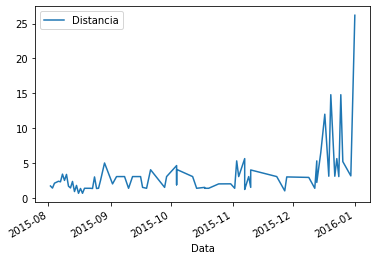

In [28]:
df.plot()

In [29]:
def calcula_total_segundos(time):
    if time is np.nan:
        return np.nan
    hrs, mins, seconds = str(time).split(":")
    seconds = int(seconds) + 60 * int(mins) + 60*60 * int(hrs)
    return seconds

In [30]:
df["Segundos"] = df.Tempo.map(calcula_total_segundos)

In [31]:
df.head(10)

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [32]:
df.describe()

,Distancia,Segundos
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


In [33]:
#preenche os valores na com 0
df.fillna(0).describe()

,Distancia,Segundos
count,81.000000,81.000000
mean,3.137531,1220.901235
std,3.634519,2240.756985
min,0.650000,0.000000
25%,1.370000,0.000000
50%,2.100000,573.000000
75%,3.050000,1426.000000
max,26.200000,15643.000000


In [34]:
df['Minutos'] = df.Segundos.map(lambda x: x / 60)

In [35]:
df.describe()

,Distancia,Segundos,Minutos
count,81.000000,52.000000,52.000000
mean,3.137531,1901.788462,31.696474
std,3.634519,2560.424171,42.673736
min,0.650000,376.000000,6.266667
25%,1.370000,583.750000,9.729167
50%,2.100000,1343.500000,22.391667
75%,3.050000,1743.250000,29.054167
max,26.200000,15643.000000,260.716667


<AxesSubplot:xlabel='Distancia', ylabel='Minutos'>

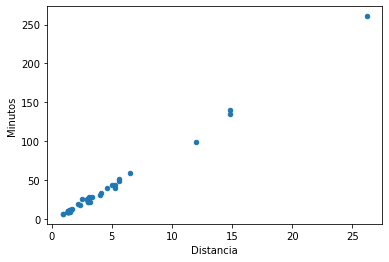

In [36]:
df.plot(x = "Distancia", y = "Minutos", kind = "scatter")

In [37]:
df.corr()

,Distancia,Segundos,Minutos
Distancia,1.000000,0.997203,0.997203
Segundos,0.997203,1.000000,1.000000
Minutos,0.997203,1.000000,1.000000


In [38]:
df.corr(method = "spearman")

,Distancia,Segundos,Minutos
Distancia,1.00000,0.96482,0.96482
Segundos,0.96482,1.00000,1.00000
Minutos,0.96482,1.00000,1.00000


In [39]:
df.corr(method = "kendall")

,Distancia,Segundos,Minutos
Distancia,1.00000,0.88305,0.88305
Segundos,0.88305,1.00000,1.00000
Minutos,0.88305,1.00000,1.00000


<AxesSubplot:>

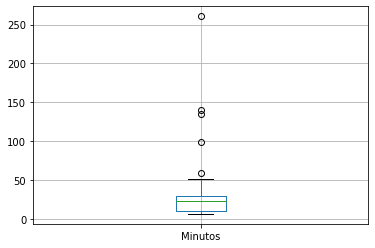

In [40]:
df.boxplot("Minutos", return_type = "axes")

In [41]:
df["Min_Por_Km"] = df.Minutos / df.Distancia

In [43]:
df["Min_Por_Km"].describe()

count    52.000000
mean      7.725297
std       0.954475
min       6.000000
25%       7.020479
50%       7.533333
75%       8.480023
max      10.000000
Name: Min_Por_Km, dtype: float64

In [44]:
df.fillna(0).head(10)

,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
Data,,,,,
2015-08-02,1.70,0,0.0,0.000000,0.000000
2015-08-03,1.40,0,0.0,0.000000,0.000000
2015-08-04,2.10,0,0.0,0.000000,0.000000
2015-08-06,2.38,0,0.0,0.000000,0.000000
2015-08-07,2.30,0,0.0,0.000000,0.000000
2015-08-08,3.40,0,0.0,0.000000,0.000000
2015-08-09,2.50,0,0.0,0.000000,0.000000
2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865
2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291


array([[<AxesSubplot:title={'center':'Min_Por_Km'}>]], dtype=object)

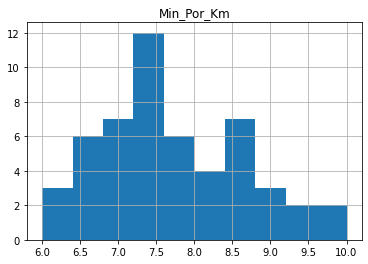

In [46]:
df.hist("Min_Por_Km")

array([[<AxesSubplot:title={'center':'Min_Por_Km'}>]], dtype=object)

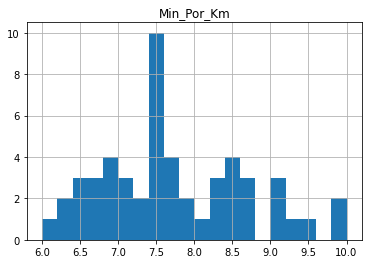

In [48]:
df.hist("Min_Por_Km", bins = 20)

array([[<AxesSubplot:title={'center':'Min_Por_Km'}>]], dtype=object)

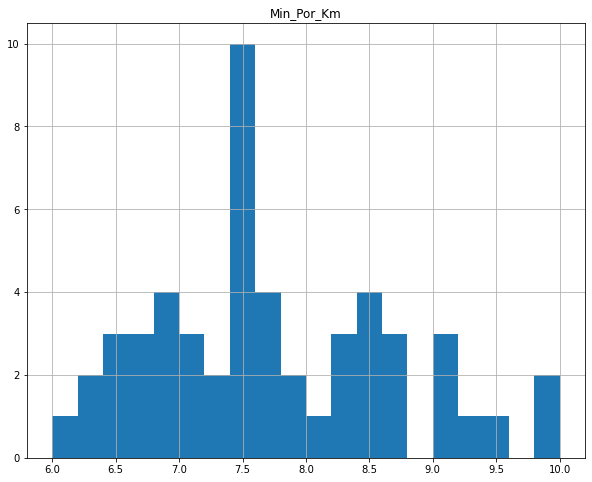

In [49]:
df.hist("Min_Por_Km", bins = 20, figsize = (10,8))

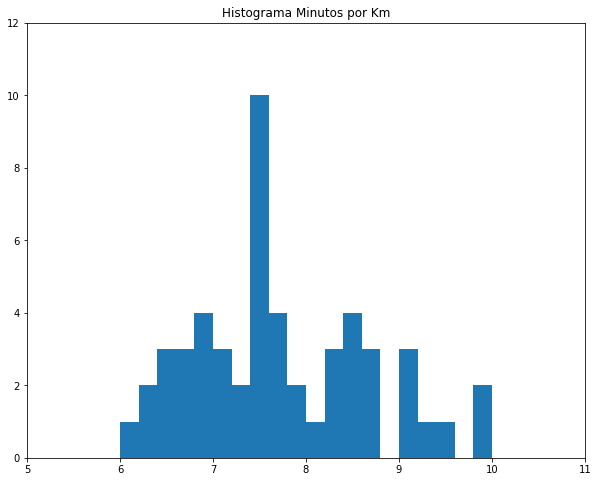

In [56]:
df.hist("Min_Por_Km", bins = 20, figsize = (10,8))
plt.xlim((5,11))
plt.ylim((0,12))
plt.title("Histograma Minutos por Km")
plt.grid(False)
plt.savefig("images/hist_minutos_por_km.png")

<AxesSubplot:xlabel='Data'>

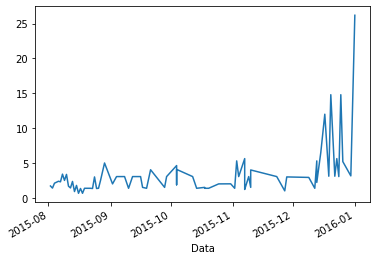

In [57]:
df["Distancia"].plot()

In [58]:
df.head()

,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
Data,,,,,
2015-08-02,1.70,NaN,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Data'>

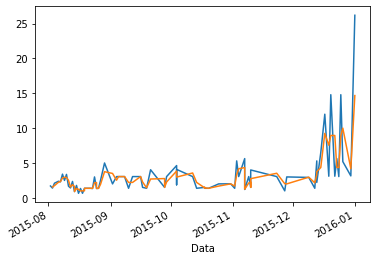

In [60]:
df["Distancia"].plot()
pd.Series(df.Distancia).rolling(window = 2).mean().plot()

<AxesSubplot:xlabel='Data'>

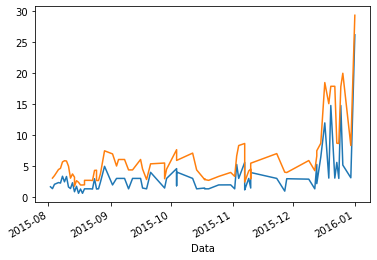

In [64]:
# windows janela de 2h
df["Distancia"].plot()
pd.Series(df.Distancia).rolling(window = 2).sum().plot()

In [65]:
df.index

DatetimeIndex(['2015-08-02', '2015-08-03', '2015-08-04', '2015-08-06',
               '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17',
               '2015-08-18', '2015-08-19', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-25', '2015-08-26', '2015-08-27',
               '2015-08-29', '2015-09-02', '2015-09-04', '2015-09-05',
               '2015-09-08', '2015-09-10', '2015-09-12', '2015-09-16',
               '2015-09-17', '2015-09-19', '2015-09-21', '2015-09-28',
               '2015-09-28', '2015-09-29', '2015-10-04', '2015-10-04',
               '2015-10-04', '2015-10-12', '2015-10-14', '2015-10-18',
               '2015-10-18', '2015-10-18', '2015-10-20', '2015-10-25',
               '2015-10-31', '2015-11-02', '2015-11-03', '2015-11-04',
      

In [66]:
df["2015-11":"2015-12"]

,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
Data,,,,,
2015-11-02,1.37,0:08:43,523.0,8.716667,6.362530
2015-11-03,5.30,0:39:26,2366.0,39.433333,7.440252
2015-11-04,3.05,0:22:12,1332.0,22.200000,7.278689
2015-11-07,5.63,0:49:05,2945.0,49.083333,8.718176
2015-11-07,1.26,NaN,NaN,NaN,NaN
2015-11-07,1.20,NaN,NaN,NaN,NaN
2015-11-09,3.05,0:22:36,1356.0,22.600000,7.409836
2015-11-10,1.50,0:09:00,540.0,9.000000,6.000000
2015-11-10,1.50,0:11:33,693.0,11.550000,7.700000


In [67]:
df["2015-11":"2015-12"]["Distancia"]

Data
2015-11-02     1.37
2015-11-03     5.30
2015-11-04     3.05
2015-11-07     5.63
2015-11-07     1.26
2015-11-07     1.20
2015-11-09     3.05
2015-11-10     1.50
2015-11-10     1.50
2015-11-10     4.00
2015-11-23     3.05
2015-11-27     1.00
2015-11-28     3.00
2015-12-09     2.93
2015-12-12     1.37
2015-12-13     5.30
2015-12-13     2.21
2015-12-15     6.50
2015-12-17    12.00
2015-12-19     3.10
2015-12-20    14.80
2015-12-22     3.10
2015-12-23     5.63
2015-12-24     3.05
2015-12-25    14.80
2015-12-26     5.20
2015-12-30     3.15
Name: Distancia, dtype: float64

<AxesSubplot:xlabel='Data'>

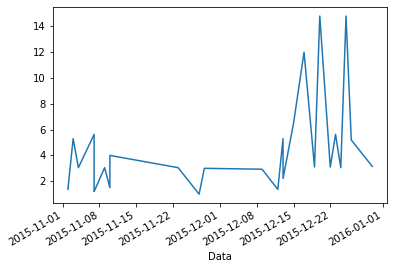

In [68]:
df["2015-11":"2015-12"]["Distancia"].plot()

In [71]:
df.loc["2015-8-12"]

Distancia        1.42
Tempo         0:10:35
Segundos          635
Minutos       10.5833
Min_Por_Km    7.45305
Name: 2015-08-12 00:00:00, dtype: object